# Workshop #8: Parameter Estimation

In [1]:
# Loading the libraries
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import scipy.optimize as opt
from scipy.integrate import quad

## Problem 1
The file vaccination_rates.csv contains sample data about the percent of the adult population worldwide that has been fully vaccinated for SARS-CoV-2 (as of mid-August 2021). Using the bootstrap method construct a 90% confidence interval for the 80-th percentile of the distribution of vaccination rates.

In [2]:
# Load the data
df = pd.read_csv('vaccination_rates.csv')
df.head()

,country,pct_vacc
0,Armenia,2.9
1,Belize,17.0
2,Bulgaria,17.0
3,Burkina Faso,0.1
4,Central African Republic,0.3


In [3]:
np.random.seed(555)
m = 10000
deltas = np.zeros(m) 

sample = np.array(df['pct_vacc'])
n = len(sample)

# calculate the sample
sample_80th = np.percentile(sample, 80)

for i in range(m):
    boot_sample = np.random.choice(sample, n)
    deltas[i] = np.percentile(boot_sample, 80) - sample_80th

    
# constructing the interval
delta_bar = np.percentile(deltas, [5, 95])

l = sample_80th - delta_bar[1]
u = sample_80th - delta_bar[0]

print(f'The 90% "confidence" interval is ({l}, {u})')

The 90% "confidence" interval is (43.39999999999999, 70.59999999999998)


## Problem 2
This amusing classical example is from von Bortkiewicz (1898). The number of fatalities that resulted from being kicked by a horse was recorded for 10 corps of Prussian cavalry over a period of 20 years, giving 200 corps-years worth of data; these are given in the file horse_kicks.csv. The yearly incidence of such fatalities is low which makes the event dying after being kicked by a horse a rare event. The Poisson distribution is most frequently appropriate for modeling such processes. If 𝑋 is the random variable that describes the number of fatalities, then 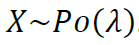. Using the data given, calculate the maximum likelihood estimate 𝜆' of the parameter 𝜆.

In [4]:
# Load the data
df = pd.read_csv('horse_kicks.csv')
df.head()

,fatalities
0,0
1,0
2,0
3,0
4,0


In [5]:
deaths = np.array(df['fatalities'])
deaths

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 4], dtype=int64)

In [16]:
lambda_0 = 2.0

# define L
def L(lmbd, data):
    #using scipy.stats
    return -np.sum( np.log( stats.poisson(lmbd).pmf(data) ) )
    #return -np.sum( stats.poisson(lmbd).logpmf(data) )

# maximize
L_opt = opt.minimize(L, lambda_0, args=(deaths), method='Nelder-Mead')
L_opt.x[0]

0.6099609374999986

## Problem 3
Suppose your friend possesses a coin which you believe is biased. Your friend tries to convince you it is not, so you decide to test if the coin really is biased. First, you flip the coin 20 times, and you get 12 heads. For things to be fair, next your friend also flips the coin 20 times, and gets 11 heads. After these two outcomes, your friend is convinced that the coin is fair/unbiased since the proportions of heads and tails are close to equal. <br /> <br /> 
You, however, are more careful, and you decide to perform a Bayesian analysis based on these two results in order to estimate the parameter 𝑝 which gives the probability of getting heads when flipping the coin in question. If 𝑋 is the random variable that models the number of heads obtained, then you notice that 𝑋 follows a binomial distribution: 𝑋~𝐵(𝑛,𝑝). The goal now is to estimate 𝑝 when 𝑛=20. The prior you choose is given by the function: <br />  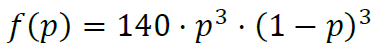 <br /> <br /> 
for 0<𝑝<1. Using this prior, and the fact that two series of 20 tosses of the coin resulted in 12, and 11 heads respectively, calculate the maximum posterior estimate (MAP) for the parameter 𝑝.

In [14]:
def prior(p):
    return 140*(p**3)*((1-p)**3)

n = 20
data = [12, 11]

numerator = lambda x, data: np.prod(stats.binom(20, x).pmf(data)) * prior(x)
denominator = quad(numerator, 0, 1, args=(data))[0]

def posterior(lmbd, data):
    return numerator(lmbd, data) / denominator

def MAP(x, data):
    return x * posterior(x, data)

map_est = quad(MAP, 0, 1, args=(data))[0]

print('MAP = ', map_est)

MAP =  0.5624999999999987
